# MNIST Handwritten Digit Recognition

# Importing libraries

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import files
uploaded = files.upload()

Saving data (2).csv to data (2).csv
Saving test.csv to test.csv


# Loading the MNIST datasets

In [13]:

test_df = pd.read_csv("test.csv")

In [14]:
data_df = pd.read_csv("data (2).csv")

In [15]:
data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# For train and test both we will use train.csv (Taking train data as complete data)

In [17]:
data_df.shape

(42000, 785)

# Data Preparation for Model Building

In [19]:
y=data_df['label']
x=data_df.drop('label',axis=1)

In [22]:
type(x)

pandas.core.frame.DataFrame

8


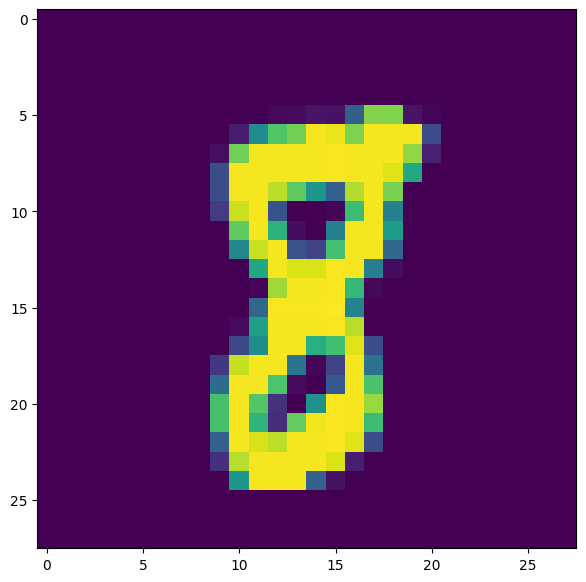

In [39]:
plt.figure(figsize=(7,7))
some_digit=4949
some_digit_image = x.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))
print(y[some_digit])

<Axes: xlabel='label', ylabel='count'>

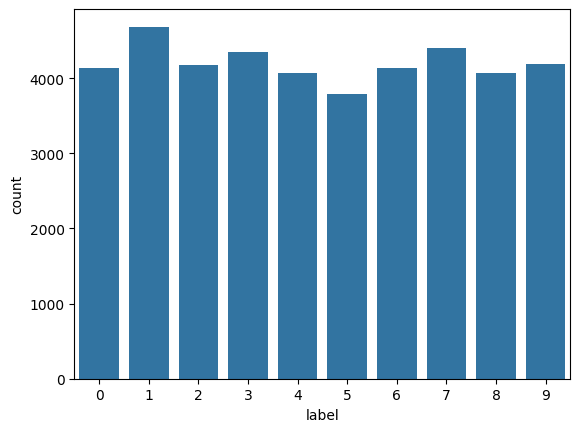

In [40]:
sns.countplot( x='label', data=data_df)

#### we can conclude that our dataset is balanced

# Splitting the train data  into train and test

In [48]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 60)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 70)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 95)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 80)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 90)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 75)

In [49]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((31500, 784), (31500,), (10500, 784), (10500,))

# **Models**

# KNN

In [50]:
scaler = StandardScaler()
scaler.fit(x_train,y_train)
x_train = scaler.transform(x_train)
x_train.shape

(31500, 784)

# k=10

In [51]:
#classifier = KNeighborsClassifier(n_neighbors = 2)
#classifier.fit(x_train, y_train)

#classifier = KNeighborsClassifier(n_neighbors = 4)
#classifier.fit(x_train, y_train)

#classifier = KNeighborsClassifier(n_neighbors = 5)
#classifier.fit(x_train, y_train)

#classifier = KNeighborsClassifier(n_neighbors = 6)
#classifier.fit(x_train, y_train)

#classifier = KNeighborsClassifier(n_neighbors = 7)
#classifier.fit(x_train, y_train)

classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [52]:
y_pred = classifier.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0, 1, 8, ..., 8, 8, 2])

In [53]:
print(accuracy_score(y_test, y_pred))

0.7973333333333333


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73      1043
           1       1.00      0.89      0.94      1173
           2       0.93      0.84      0.89      1023
           3       0.94      0.75      0.84      1096
           4       0.99      0.55      0.71      1007
           5       0.98      0.50      0.66       949
           6       0.95      0.91      0.93      1033
           7       0.95      0.84      0.89      1145
           8       0.48      0.95      0.64       971
           9       0.84      0.72      0.77      1060

    accuracy                           0.80     10500
   macro avg       0.87      0.79      0.80     10500
weighted avg       0.87      0.80      0.80     10500



In [55]:
print(confusion_matrix(y_test, y_pred))

[[1038    0    0    0    0    0    0    0    5    0]
 [   3 1042   14    1    0    0    7    1  105    0]
 [  94    0  862    8    0    0    9    6   43    1]
 [  68    1   17  820    0    8    2    2  177    1]
 [ 192    0    3    0  555    0   11    7  149   90]
 [ 171    0    2   27    0  473   17    1  253    5]
 [  82    0    0    0    0    0  936    0   15    0]
 [  31    0   21    6    1    0    0  960   78   48]
 [  33    0    4    4    1    0    4    1  924    0]
 [  75    0    0    2    1    1    0   33  186  762]]


# **10NN-79.73% accuracy**